In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score

C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\getlimits.py:174: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-112)),
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\getlimits.py:53: RuntimeWarning: divide by zero encountered in log10
  self.precision = int(-log10(self.eps))
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\getlimits.py:54: RuntimeWarning: divide by zero encountered in power
  self.resolution = float_to_float(float_conv(10) ** (-self.precision))
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\getlimits.py:186: RuntimeWarning: divide by zero encountered in exp2
  epsneg_f80 = exp2(ld(-64))
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\getlimits.py:187: RuntimeWarning: divide by zero encountered in exp2
  tiny_f80 = exp2(ld(-16382))
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\getlimits.py:201: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-63)),
C:\Users\ruiwa\anaconda3\lib\site-packages\nump

C:\Users\ruiwa\anaconda3\lib\site-packages\scipy\stats\_multivariate.py:32: RuntimeWarning: divide by zero encountered in log
  _LOG_2 = np.log(2)
C:\Users\ruiwa\anaconda3\lib\site-packages\scipy\stats\_multivariate.py:33: RuntimeWarning: divide by zero encountered in log
  _LOG_PI = np.log(np.pi)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\function_base.py:129: RuntimeWarning: divide by zero encountered in multiply
  start = asanyarray(start) * 1.0
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\function_base.py:130: RuntimeWarning: divide by zero encountered in multiply
  stop  = asanyarray(stop)  * 1.0
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\function_base.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  delta = stop - start
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\function_base.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  step = delta / div
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core

In [85]:
data = pd.read_csv('C:/Users/ruiwa/Documents/课件/Machine learning/train.csv')
data_orig = data
labels = data[['label']]
data = data.drop(['label'],1)
print (data_orig.info())
data_orig.describe()

C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\frame.py:2464: RuntimeWarning: divide by zero encountered in less
  if num < 1024.0:
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\frame.py:2466: RuntimeWarning: divide by zero encountered in true_divide
  num /= 1024.0
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\frame.py:2466: RuntimeWarning: divide by zero encountered in double_scalars
  num /= 1024.0
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\io\formats\format.py:1549: RuntimeWarning: divide by zero encountered in greater_equal
  or not np.all(percentiles >= 0)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\io\formats\format.py:1550: RuntimeWarning: divide by zero encountered in less_equal
  or not np.all(percentiles <= 1)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\io\formats\format.py:1554: RuntimeWarning: divide by zero encountered in multiply
  percentiles = 100 * percentiles
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\numeric.py

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31428 entries, 0 to 31427
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   label         31428 non-null  int64
 1   id            31428 non-null  int64
 2   visitTime     31428 non-null  int64
 3   purchaseTime  31428 non-null  int64
 4   hour          31428 non-null  int64
 5   C1            31428 non-null  int64
 6   C2            31428 non-null  int64
 7   C3            31428 non-null  int64
 8   C4            31428 non-null  int64
 9   C5            31428 non-null  int64
 10  C6            31428 non-null  int64
 11  C7            31428 non-null  int64
 12  C8            31428 non-null  int64
 13  N1            31428 non-null  int64
 14  C9            31428 non-null  int64
 15  N2            31428 non-null  int64
 16  N3            31428 non-null  int64
 17  N4            31428 non-null  int64
 18  N5            31428 non-null  int64
 19  N6            31428 non-n

C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5562: RuntimeWarning: divide by zero encountered in equal
  if (res == data).all():
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\numeric.py:2327: RuntimeWarning: divide by zero encountered in equal
  return bool(asarray(a1 == a2).all())
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\internals\managers.py:226: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\dtypes\missing.py:262: RuntimeWarning: divide by zero encountered in isnan
  result = np.isnan(values)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\io\formats\format.py:1375: RuntimeWarning: divide by zero encountered in invert
  imask = (~mask).ravel()
C:\Users\ruiwa\anaconda3\lib\site

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
count,31428.000000,31428.000000,3.142800e+04,3.142800e+04,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,3.142800e+04,...,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,31428.000000,3.142800e+04,3.142800e+04,3.142800e+04
mean,-0.996373,321870.448835,1.931855e+07,3.504330e+04,11.799701,2.264373e+09,1.331820e+09,2.255368e+09,1.018468e+09,2.741699e+09,...,0.134307,0.002386,0.027269,0.002164,0.415680,0.042319,0.057560,2.218926e+09,2.939366e+09,2.158890e+09
std,0.085098,184665.780120,1.690395e+04,8.221503e+05,4.695434,1.077516e+09,7.900907e+08,1.125852e+09,7.260969e+08,3.771211e+08,...,1.258795,0.156001,0.562668,0.079745,3.184785,1.008314,1.158253,1.235285e+09,1.020598e+09,1.416777e+09
min,-1.000000,37.000000,1.927433e+07,-1.000000e+00,0.000000,7.942600e+04,4.033814e+08,5.538985e+06,3.063949e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.626600e+04,4.393702e+07,2.456084e+08
25%,-1.000000,162636.500000,1.930609e+07,-1.000000e+00,8.000000,1.464958e+09,4.033814e+08,1.408383e+09,6.524818e+08,2.116767e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.140301e+09,2.379634e+09,1.213939e+09
50%,-1.000000,322691.500000,1.931761e+07,-1.000000e+00,12.000000,2.569487e+09,1.235983e+09,2.243934e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.274128e+09,3.617852e+09,1.284343e+09
75%,-1.000000,481852.000000,1.933113e+07,-1.000000e+00,15.000000,2.834768e+09,2.018710e+09,3.326547e+09,6.524818e+08,2.967513e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.376114e+09,3.831440e+09,4.220792e+09
max,1.000000,638505.000000,1.936054e+07,1.935732e+07,23.000000,4.294924e+09,2.541204e+09,4.292704e+09,2.308171e+09,3.955179e+09,...,20.000000,20.000000,20.000000,10.000000,97.000000,85.000000,86.000000,4.294964e+09,3.831440e+09,4.220792e+09


C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\internals\managers.py:226: RuntimeWarning: divide by zero encountered in equal
  if (new_blknos == -1).any():
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:45: RuntimeWarning: divide by zero encountered in reduce
  return umr_any(a, axis, dtype, out, keepdims)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\frame.py:7466: RuntimeWarning: divide by zero encountered in isfinite
  correl = libalgos.nancorr(ensure_float64(mat), minp=min_periods)
C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5562: RuntimeWarning: divide by zero encountered in equal
  if (res == data).all():
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\numeric.py:2327: RuntimeWarning: divide by zero encountered in equal
  return bool(asarray(a

C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2483: RuntimeWarning: divide by zero encountered in double_scalars
  x0t -= delta
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2485: RuntimeWarning: divide by zero encountered in double_scalars
  x1t += delta
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\function_base.py:129: RuntimeWarning: divide by zero encountered in multiply
  start = asanyarray(start) * 1.0
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\function_base.py:130: RuntimeWarning: divide by zero encountered in multiply
  stop  = asanyarray(stop)  * 1.0
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\function_base.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  delta = stop - start
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\function_base.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  step = delta / div
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\cor

C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:362: RuntimeWarning: divide by zero encountered in double_scalars
  width = xmax - xmin
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:363: RuntimeWarning: divide by zero encountered in double_scalars
  height = ymax - ymin
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:375: RuntimeWarning: divide by zero encountered in double_scalars
  offsetx = (xmin + xmax) / 2
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:415: RuntimeWarning: divide by zero encountered in double_scalars
  xmin -= offsetx
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:416: RuntimeWarning: divide by zero encountered in double_scalars
  ymin -= offsety
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\text.py:421: RuntimeWarning: divide by zero encountered in subtract
  xys = M.transform(offset_layout) - (offsetx, offsety)
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\transforms.py:673

C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\axis.py:2338: RuntimeWarning: divide by zero encountered in double_scalars
  (right + self.labelpad * self.figure.dpi / 72, y)
C:\Users\ruiwa\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:195: RuntimeWarning: divide by zero encountered in greater
  return rgbaArr[:,:3].dot((.299, .587, .114)) > .5
C:\Users\ruiwa\anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py:184: RuntimeWarning: divide by zero encountered in equal
  if ticksLight.size and (ticksLight == ticksLight[0]).all():
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\figure.py:898: RuntimeWarning: divide by zero encountered in isfinite
  if not all(np.isfinite(_) for _ in (w, h)):
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\figure.py:908: RuntimeWarning: divide by zero encountered in double_scalars
  canvasw = w * dpival
C:\Users\ruiwa\anaconda3\lib\site-packages\matplotlib\figure.py:909: RuntimeWarning: divide by zero encountered 

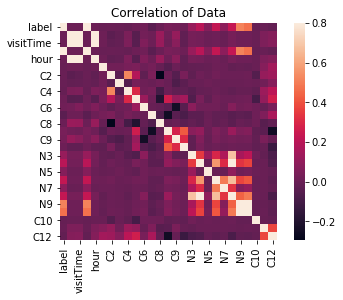

In [5]:
data_corr = data_orig.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

In [87]:
Y = np.array(data_orig[['label']])
X = np.array(data_orig.drop(['label'],1))
X = preprocessing.scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

C:\Users\ruiwa\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5015: RuntimeWarning: divide by zero encountered in equal
  mask = indexer == -1
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\function_base.py:4400: RuntimeWarning: divide by zero encountered in less
  inside_bounds = (obj < N) & (obj >= -N)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\function_base.py:4400: RuntimeWarning: divide by zero encountered in greater_equal
  inside_bounds = (obj < N) & (obj >= -N)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\function_base.py:4400: RuntimeWarning: divide by zero encountered in bitwise_and
  inside_bounds = (obj < N) & (obj >= -N)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\function_base.py:4408: RuntimeWarning: divide by zero encountered in greater_equal
  positive_indices

In [97]:
classifier1 = RandomForestClassifier()
classifier1.fit(X_train, Y_train)
y_pred1 = classifier1.predict(X_test)

C:\Users\ruiwa\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\ruiwa\anaconda3\lib\site-packages\sklearn\utils\validation.py:49: RuntimeWarning: divide by zero encountered in isfinite
  if is_float and (np.isfinite(_safe_accumulator_op(np.sum, X))):
C:\Users\ruiwa\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:315: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]


In [98]:
print(classification_report(Y_test, y_pred1))
print(confusion_matrix(Y_test, y_pred1))

C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:315: RuntimeWarning: divide by zero encountered in not_equal
  mask[1:] = aux[1:] != aux[:-1]
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: RuntimeWarning: divide by zero encountered in not_equal
  mask &= (ar1 != a)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:565: RuntimeWarning: divide by zero encountered in bitwise_and
  mask &= (ar1 != a)
C:\Users\ruiwa\anaconda3\lib\site-packages\sklearn\metrics\classification.py:425: RuntimeWarning: divide by zero encountered in equal
  tp = y_true == y_pred
C:\Users\ruiwa\anaconda3\lib\site-packages\sklearn\metrics\classification.py:480: RuntimeWarning: divide by zero encountered in subtract
  fp = pred_sum - tp_sum
C:\Users\ruiwa\anaconda3\lib\site-packages\sklearn\metrics\classification.py:481: RuntimeWarning: divide by zero encountered in subtract
  fn = true_sum - tp_sum
C:\Users\ruiwa\anaconda3\lib\site-packages\sklearn\met

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      9413
           1       1.00      0.88      0.93        16

    accuracy                           1.00      9429
   macro avg       1.00      0.94      0.97      9429
weighted avg       1.00      1.00      1.00      9429

[[9413    0]
 [   2   14]]


C:\Users\ruiwa\anaconda3\lib\site-packages\sklearn\metrics\classification.py:278: RuntimeWarning: divide by zero encountered in less
  ind = np.logical_and(y_pred < n_labels, y_true < n_labels)
C:\Users\ruiwa\anaconda3\lib\site-packages\sklearn\metrics\classification.py:278: RuntimeWarning: divide by zero encountered in logical_and
  ind = np.logical_and(y_pred < n_labels, y_true < n_labels)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:30: RuntimeWarning: divide by zero encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\ruiwa\anaconda3\lib\site-packages\numpy\core\_methods.py:34: RuntimeWarning: divide by zero encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
